## Problem: Predict whether or not a passenger survive the shipwreck


### Objective:
#### The goal of this model is to predict survival in the sinking titanic ship, This model should be able to accurately predict survival with related subsets of passengers' information is provided.
   

### Content:
- Introduction
- Data Acquisition
- Data Exploration
- Data Cleaning
- Data Analysis (Prediction)
- Reports (Visualization)
- Implementation of insights

### Introduction
#### In 1915, 1502 out of 2224 lost their lives in the wreck of titanic ship. Instructively, type of passengers that are likely survive the disaster are analyze based on 12 factors (variables) like age, gender, class, and others. Furthermore,  predict the number of passengers that will likely survive the shipwreck and not.

### Data acquisition
#### Three different datasets are provided viz:
 -  Train set 
 - Test set
 - Submission

### Data Acquisition
#### Pandas is imported for data ingestion along with data cleaning where necesary.
#### numpy provide numerical computation and conversion of ingested data to array


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
!cd Documents
!ls Documents/'Data analytics'/titanic

test (1).csv  titanic       train (1).csv


In [49]:
train = pd.read_csv("Documents/Data analytics/titanic/train (1).csv")
test = pd.read_csv("Documents/Data analytics/titanic/test (1).csv")

### Lets have a look at our datasets

### Data Exploration
#### Data is explored to maintain meaningful variables and remove irrelevant variables. i will statistically display all data to evaluate missing values and significants of some features
#### From the table below it is obvious that the following have no correlation towards who survive the shipwreck and who does not:
- PassengerId
- Pclass
- Sex
- Age
- SibSp
- Parch
- Ticket 
- Fare
- Cabin
- Embarked


In [50]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Passengers

#### PassengerId feature is an indexer, it does not contribute to factors we can use in this model. So we are deleting from the dataset

In [51]:
train = train.drop('PassengerId', 1)

In [52]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survived

####  Evaluating the number of those that survive and those that did not survive the shipwreck shows that only 39% survived the shipwreck leaving 62% dead 

In [53]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

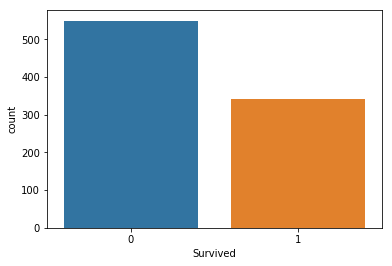

In [54]:
sns.countplot(train['Survived'])

## Pclass

#### Pclass also has a vital role to play, it is observed that, the higher the class, the more the chances of survival. From what is computed below, focusing on passengers that did not survive the shipwreck, it shows that least passengers bought class 2 ticket compare to class 1 and class 3. Therefore, life loss increases accordingly from class 1 to class 3

In [55]:
train['Survived'].groupby(train['Pclass']).value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

#### The survival of class 1 is higher than class 3, despite the large magnitude of class 3

In [56]:
train['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

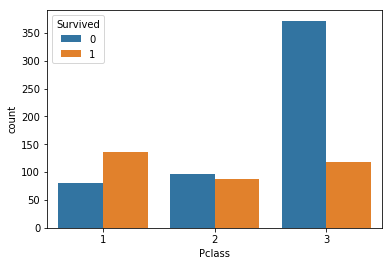

In [57]:
sns.countplot(train['Pclass'], hue = train['Survived'])

## Name

#### There is no effect of Passengers' Name on survival's status, though there seems to be slight correlation between the length of Name (Prefix) and Survival status.

#### Let's check it out by splitting the prefix

In [58]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split(".")[0])
#train['Survived'].groupby(train['Name_Title']).value_counts()

test['Name_Title'] = test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split(".")[0])


#### Above output shows that young females constitute the highest survival of the shipwreck compare to others.  Please read further below to get close estimate of survival based on age.



#### From the length of prefix, it appears that names with 5 characters have effect on target (survived) 

In [59]:
train['Name_Title'].apply(lambda x : len(x)).groupby(train['Survived']).value_counts()
#Title_len = train['Name_Title'].apply(lambda x : len(x))

Survived  Name_Title
0         3             440
          5              56
          4              34
          7              17
          6               1
          9               1
1         5             130
          4             102
          3              85
          7              23
          6               1
          13              1
Name: Name_Title, dtype: int64

In [60]:
#train = train.drop('Name')

## Sex

#### From below computation, it appears more female survive the shipwreck compare to male.

In [61]:
train['Survived'].groupby(train['Sex']).value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

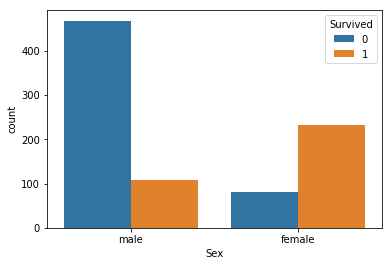

In [62]:
sns.countplot(train['Sex'], hue = train['Survived'])

## Age

#### Despite the large magnitude of male present, their survival is less compare to female. Now that its clear the survival of female  is large, we find that young people survived the shipwreck more compare to others.

In [63]:
train['Survived'].groupby(pd.qcut(train['Age'], 5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

#### It is a good practise to confirm if there is missing value in Age features. It is therefore confirm that 29% of age features are null values.

In [64]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [65]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

### We enhance the strength of SibSp and Parch relationship on taget (survived) features by adding both features


In [66]:
train['Family'] = train['SibSp'] + train['Parch']

## Ticket

#### Relationship between ticket and target (Survived) is akin to Pclass.

In [67]:
train['Survived'].groupby(train['Ticket']).value_counts()

Ticket             Survived
110152             1           3
110413             1           2
                   0           1
110465             0           2
110564             1           1
110813             1           1
111240             0           1
111320             0           1
111361             1           2
111369             1           1
111426             1           1
111427             1           1
111428             1           1
112050             0           1
112052             0           1
112053             1           1
112058             0           1
112059             0           1
112277             1           1
112379             0           1
113028             0           1
113043             0           1
113050             0           1
113051             0           1
113055             1           1
113056             0           1
113059             0           1
113501             0           1
113503             0           1
113505         

## Fare

### It obvious from below analysis that Fare effect on target (Survived) varies, there is no definite relationship between target and Fare, but there is comparing to Pclass. hence, the higher the Fare, the safer the passenger.

In [68]:
train['Fare'].groupby(train['Pclass']).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [69]:
train['Fare'].groupby(train['Survived']).mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

## Cabin

#### The possibility of getting escape route through the cabin emergency door

In [70]:
train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

#### There is a relationship between Cabin and target (Survived), this implies those in the first class have more than one exit and it is as well safe for any accident that may occur. first class passengers survive the shipwreck compare to other classes

In [71]:
train['Pclass'].groupby(train['Cabin'].isnull()).value_counts()

Cabin  Pclass
False  1         176
       2          16
       3          12
True   3         479
       2         168
       1          40
Name: Pclass, dtype: int64

In [72]:
train['Survived'].groupby(train['Cabin'].isnull()).value_counts()

Cabin  Survived
False  1           136
       0            68
True   0           481
       1           206
Name: Survived, dtype: int64

#### Cabin observations have alphabets combined with integers, which may confuse the algorithm from given a correct prediction. Thus, we remove the characters.

In [73]:
train['cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[0][1:])
train['cabin_num'].replace('an', np.NaN, inplace = True)
train['cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

0        NaN
1       85.0
2        NaN
3      123.0
4        NaN
5        NaN
6       46.0
7        NaN
8        NaN
9        NaN
10       6.0
11     103.0
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21      56.0
22       NaN
23       6.0
24       NaN
25       NaN
26       NaN
27      23.0
28       NaN
29       NaN
       ...  
861      NaN
862     17.0
863      NaN
864      NaN
865      NaN
866      NaN
867     24.0
868      NaN
869      NaN
870      NaN
871     35.0
872     51.0
873      NaN
874      NaN
875      NaN
876      NaN
877      NaN
878      NaN
879     50.0
880      NaN
881      NaN
882      NaN
883      NaN
884      NaN
885      NaN
886      NaN
887     42.0
888      NaN
889    148.0
890      NaN
Name: cabin_num, Length: 891, dtype: float64

In [74]:
test['cabin_num'] = test['Cabin'].apply(lambda x: str(x).split(' ')[0][1:])
test['cabin_num'].replace('an', np.NaN, inplace = True)
test['cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12      45.0
13       NaN
14      31.0
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24      57.0
25       NaN
26      36.0
27       NaN
28      21.0
29       NaN
       ...  
388      NaN
389      NaN
390     24.0
391     28.0
392      NaN
393      NaN
394      NaN
395     31.0
396      NaN
397     41.0
398      NaN
399      NaN
400      7.0
401      NaN
402      NaN
403      NaN
404     40.0
405     38.0
406      NaN
407     80.0
408      NaN
409      NaN
410      NaN
411     78.0
412      NaN
413      NaN
414    105.0
415      NaN
416      NaN
417      NaN
Name: cabin_num, Length: 418, dtype: float64

## Embarked

#### There are more survival of people from 'S' compare to other location

In [75]:
train['Embarked'].groupby(train['Survived']).value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [76]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Two missing values are observed. 

In [77]:
train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

#### Missing data was detected and has been fixed using fillna() method along with the average of Age feature. Now let us confirm the correlation strength between Age, Survival and Sex. this comparison will help in knowing which is most significant among the three listed

# Data Cleaning
## Data is converted to Dataframe to have an overview of the data structure, including fixing of missing values by finding the mean of the observations.


In [86]:
train.isnull().count()

Survived      891
Pclass        891
Name          891
Sex           891
Age           891
SibSp         891
Parch         891
Ticket        891
Fare          891
Cabin         891
Embarked      891
Name_Title    891
Family        891
cabin_num     891
dtype: int64

### For feature engineering sake, Name Feature and Cabin features will be removed since another variable that is similar to them have been created

In [87]:
del train['Name']
del train['Cabin']
train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Title,Family,cabin_num
0,0,3,male,22.0,1,0,A/5 21171,7.25,S,Mr,1,NaN


#### Provided list below are features with missing values
- cabin_num
- Age
- Embarked

In [88]:
train['cabin_num'] = train['cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
test['cabin_num'] = test['cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
train['cabin_num'] = train['cabin_num'].fillna(train['cabin_num'].mean())
test['cabin_num'] = test['cabin_num'].fillna(test['cabin_num'].mean())
test['cabin_num'].isnull().value_counts()

False    418
Name: cabin_num, dtype: int64

# Age

In [89]:
train['Age_flag'] = train['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
test['Age_flag'] = test['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
test['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

#### Before we impute missing value, we create a flag. Moreso, we need a value that is more than just mean of Age observations, so we use Age grouping it by the mean of Name_Title and Pclass at the same time.

In [99]:
Meantrain = train['Age'].groupby([train['Name_Title'], train['Pclass']])
Meantest = test['Age'].groupby([test['Name_Title'], test['Pclass']])

train['Age'] = Meantrain.transform(lambda x: x.fillna(x.mean()))
test['Age'] = Meantrain.transform(lambda x: x.fillna(x.mean()))
test['Age'].isnull().value_counts()

False    418
Name: Age, dtype: int64

#### In Embarked feature, most frequent value is S, therefore, we impute S in all missing value

In [100]:
train['Embarked'].fillna(method = 'ffill', inplace = True)
test['Embarked'].fillna(method = 'ffill', inplace = True)
train['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [101]:
train['Fare'].isnull().value_counts()

False    891
Name: Fare, dtype: int64

# Feature Engineering

## List of effective predictors on dependent variables
- Pclass
- Sex
- Age
- Fare
- Embarked
- Name_Title
- Family
- cabin_num



#### It is imperative that both train and test data should have the same number of columns and ensure all null values are imputed where needs be.

In [102]:
train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Title,Family,cabin_num,Age_flag
0,0,3,male,22.0,1,0,A/5 21171,7.25,S,Mr,1,50.102041,0


In [103]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,cabin_num,Age_flag
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,NaN,Q,Mr,47.383721,0


#### Apparently, Family size is missing in test set. below operations added SibSp and Parch, which provide the variable "Family". This increases the effect of SibSp and Parch on the the taregt(Survived).

In [104]:
test['Family'] = test['SibSp'] + test['Parch']
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,cabin_num,Age_flag,Family
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,NaN,Q,Mr,47.383721,0,0


In [105]:
train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

### Removing all irrelevant features before fitting it into model

In [106]:
test = test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin'], axis = 1)
train = train.drop(['SibSp', 'Parch'], axis = 1)

In [107]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### SInce modeling algorithms do not accept categorical observations (non-continuous), Pclass and Embarked variable are encoded to get dummy variables. More so, Sex variable is also encoded into binary form. 

In [108]:
test.corr(method = 'pearson')

,Pclass,Age,Fare,cabin_num,Age_flag,Family
Pclass,1.000000,0.028196,-0.577147,-0.048149,0.282681,0.012736
Age,0.028196,1.000000,-0.015676,0.013869,0.026224,0.066749
Fare,-0.577147,-0.015676,1.000000,0.188633,-0.188134,0.249924
cabin_num,-0.048149,0.013869,0.188633,1.000000,-0.006196,-0.003026
Age_flag,0.282681,0.026224,-0.188134,-0.006196,1.000000,-0.051547
Family,0.012736,0.066749,0.249924,-0.003026,-0.051547,1.000000


In [109]:
train.corr(method = 'pearson')

,Survived,Pclass,Age,Fare,Family,cabin_num,Age_flag
Survived,1.000000,-0.338481,-0.076577,0.257307,0.016639,-0.024713,-0.092197
Pclass,-0.338481,1.000000,-0.403874,-0.549500,0.065997,-0.022227,0.172933
Age,-0.076577,-0.403874,1.000000,0.114526,-0.284731,0.040692,-0.040678
Fare,0.257307,-0.549500,0.114526,1.000000,0.217138,0.044306,-0.100707
Family,0.016639,0.065997,-0.284731,0.217138,1.000000,-0.036022,-0.049043
cabin_num,-0.024713,-0.022227,0.040692,0.044306,-0.036022,1.000000,0.059237
Age_flag,-0.092197,0.172933,-0.040678,-0.100707,-0.049043,0.059237,1.000000


#### Rearranged columns to ensure both training and test set have the same positioning for variables

In [110]:
train = train [['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Name_Title', 'cabin_num', 'Age_flag', 'Family', 'Survived']]
train.head(1)

,Pclass,Sex,Age,Fare,Embarked,Name_Title,cabin_num,Age_flag,Family,Survived
0,3,male,22.0,7.25,S,Mr,50.102041,0,1,0


In [111]:
test.head(1)

,Pclass,Sex,Age,Fare,Embarked,Name_Title,cabin_num,Age_flag,Family
0,3,male,22.0,7.8292,Q,Mr,47.383721,0,0


#### Columns names are changed to indexes in order for OneHotEncoder to generate dummy variables from Pclass, Name_Title and Emabarked

In [112]:
Xtrain = train.iloc[:, [0,1,2,3,4,5,6,7,8]].values
Xtrain = pd.DataFrame(Xtrain)
ytrain = train.iloc[:, 9,]
Xtrain.head()


,0,1,2,3,4,5,6,7,8
0,3,male,22,7.25,S,Mr,50.102,0,1
1,1,female,38,71.2833,C,Mrs,85,0,1
2,3,female,26,7.925,S,Miss,50.102,0,0
3,1,female,35,53.1,S,Mrs,123,0,1
4,3,male,35,8.05,S,Mr,50.102,0,0


In [113]:
Xtest = test.iloc[:, [0,1,2,3,4,5,6,7,8]].values
Xtest = pd.DataFrame(Xtest)
Xtest[3] = Xtest[3].fillna(method = 'ffill') # impute missing value
Xtest.isnull().any()
Xtest.head()

,0,1,2,3,4,5,6,7,8
0,3,male,22,7.8292,Q,Mr,47.3837,0,0
1,3,female,38,7.0000,S,Mrs,47.3837,0,1
2,2,male,26,9.6875,Q,Mr,47.3837,0,0
3,3,male,35,8.6625,S,Mr,47.3837,0,0
4,3,female,35,12.2875,S,Mrs,47.3837,0,2


#### The following indexes will be encoded since they are discrete and modelling techniques do not support categorical values, all should be in numeric form.

### Encode training set

In [117]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
train_encoder = LabelEncoder()
Xtrain[0] = train_encoder.fit_transform(Xtrain[0])
Xtrain.head()

,0,1,2,3,4,5,6,7,8
0,2,1,22,7.25,2,11,50.102,0,1
1,0,0,38,71.2833,0,12,85,0,1
2,2,0,26,7.925,2,8,50.102,0,0
3,0,0,35,53.1,2,12,123,0,1
4,2,1,35,8.05,2,11,50.102,0,0


#### Index 0, 4 and 5 are further encoded to generate dummy variables using OnHotEncoder. This exercise eliminate hierarchical computation within dataset that are more than binary

In [118]:
trainHot = OneHotEncoder(categorical_features = [[0,4,5]])
Xtrain = trainHot.fit_transform(Xtrain).toarray()

In [119]:
Xtrain = pd.DataFrame(Xtrain)

Xtrain.head(20)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,22.000000,7.2500,50.102041,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,38.000000,71.2833,85.000000,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.000000,7.9250,50.102041,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.000000,53.1000,123.000000,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,35.000000,8.0500,50.102041,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,28.724891,8.4583,50.102041,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,54.000000,51.8625,46.000000,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.000000,21.0750,50.102041,0.0,4.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27.000000,11.1333,50.102041,0.0,2.0
9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.000000,30.0708,50.102041,0.0,1.0


### To avoid "Dummy variable trap", we eliminate the first index.

In [120]:
Xtrain = Xtrain.drop(Xtrain[[0,6,7,8,9,19,21,22]], axis = 1)
Xtrain.head().reset_index()

,index,1,2,3,4,5,10,11,12,13,...,16,17,18,20,23,24,25,26,27,28
0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,22.0,7.2500,50.102041,0.0,1.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,38.0,71.2833,85.000000,0.0,1.0
2,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,7.9250,50.102041,0.0,0.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,35.0,53.1000,123.000000,0.0,1.0
4,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,35.0,8.0500,50.102041,0.0,0.0


In [121]:
len(Xtrain.columns)

21

### Encode test set

In [125]:
test_encoder = LabelEncoder()
Xtest[0] = test_encoder.fit_transform(Xtest[0])
#Xtest[3].isnull().value_counts()
Xtest.head()

,0,1,2,3,4,5,6,7,8
0,2,1,22,7.8292,1,5,47.3837,0,0
1,2,0,38,7.0000,2,6,47.3837,0,1
2,1,1,26,9.6875,1,5,47.3837,0,0
3,2,1,35,8.6625,2,5,47.3837,0,0
4,2,0,35,12.2875,2,6,47.3837,0,2


In [126]:
testHot = OneHotEncoder(categorical_features = [[0,4,5]])
Xtest = testHot.fit_transform(Xtest).toarray()

In [127]:
Xtest = pd.DataFrame(Xtest)
Xtest.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,22.0,7.8292,47.383721,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,38.0,7.0000,47.383721,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,26.0,9.6875,47.383721,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,35.0,8.6625,47.383721,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,35.0,12.2875,47.383721,0.0,2.0


In [128]:
Xtest2 = Xtest.drop(Xtest.columns[6], axis=1)

In [129]:
len(Xtest2.columns)

20

#### Before fitting my dataset in a model, i used GridSearchCV to figure out hyperparameter that will enable me to identify perfect parameters in random forest classifier.

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [131]:
RFC = RandomForestClassifier( max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

In [132]:
grids = {"criterion" : ['gini', 'entropy'], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

In [133]:
grid = GridSearchCV(estimator = RFC, param_grid = grids, scoring='accuracy', cv=3, n_jobs=-1)

In [134]:
gridsearch = grid.fit(Xtrain.iloc[:, 1:], ytrain)

In [135]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 400}
0.8338945005611672


#### Evaluation and Estimation

#### Here is where i fit in my model, after i have identify my most valuable parameter in randonm forest. There is no point going further to test other techniques. This model results to 88% accuracy... Wow

In [136]:
RFC = RandomForestClassifier(criterion = 'gini', min_samples_leaf= 1, min_samples_split = 16, n_estimators = 400, random_state = 0)

In [137]:
RFC.fit(Xtrain.iloc[:, 1:], ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [138]:
RFC.score(Xtrain.iloc[:, 1:], ytrain)

0.8821548821548821

#### Now is time to predict our test set, including submission file to Kaggle

#### I injest the test set again in order for me to extract the PassengersId

In [145]:
test = pd.read_csv("Documents/Data analytics/titanic/test (1).csv")
passenger = test['PassengerId']
passenger.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [146]:
ypred = RFC.predict(Xtest2.iloc[:, 0:])

In [160]:
ypred = pd.DataFrame(ypred)
ypred['passenger'] = passenger

#### Moving passenger to index 0

In [163]:
ypred=ypred[['passenger', 0]]
ypred = ypred.rename(columns = {'passenger': 'PassengerId', 0: 'Survived'})
ypred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [170]:
ypred.to_csv('submission.csv', sep=",", index = False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,0
9,901,1


## Conclusion

This exercise provides the chances of trying different techniques in order to ascertain which predictors are stronger compare to others. 88% accuracy was obtained using Random forest classifier. 